In [5]:
import pandas as pd

# Load benchmark results
df = pd.read_csv("results.csv")

# Preview
df.head()


,method,file_size,query,time_ms
0,python_in_list,10000,alpha,2.6046
1,python_in_list,10000,notfound,2.0273
2,python_in_list,10000,foobar,1.8864
3,python_in_list,10000,lastline,1.8482
4,python_in_set,10000,alpha,5.8461


In [6]:
# Average time per method across all sizes and queries
df.groupby("method")["time_ms"].mean().sort_values().to_frame("avg_time_ms")

,avg_time_ms
method,
grep_subprocess,4.876713
binary_search,18.450337
python_in_list,24.456106
memory_mapped,29.319375
python_in_set,50.467906


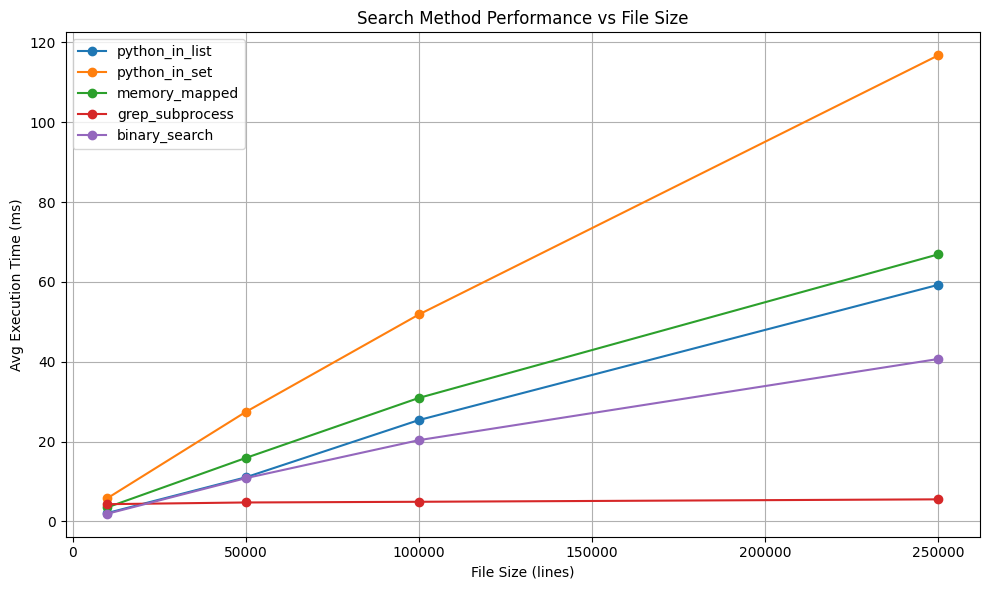

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for method in df["method"].unique():
    subset = df[df["method"] == method]
    grouped = subset.groupby("file_size")["time_ms"].mean()
    plt.plot(grouped.index, grouped.values, marker="o", label=method)

plt.title("Search Method Performance vs File Size")
plt.xlabel("File Size (lines)")
plt.ylabel("Avg Execution Time (ms)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()